In [2]:
# ! pip install lightgbm

## Import Libraries

In [34]:
#import libraries yg dibutuhkan
import pandas as pd #memanggil pandas sebagai pd
import matplotlib.pyplot as plt # memanggil matplotlib sebagai plt
import numpy as np #memanggil numpy sebagai np
import seaborn as sns #memanggil seaborn sebagai sns

from sklearn.model_selection import train_test_split #memanggil train_test dari sklearn model
from feature_engine.outliers import Winsorizer #memanggil winsorizer dari feature engine
from scipy.stats import kendalltau, pearsonr #memanggil kendalltau dan pearsonr dari scipy.stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler,RobustScaler  #mamanggil minmaxscaler dari sklearn processing
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
from sklearn.preprocessing import OneHotEncoder, LabelEncoder #memanggil model encode onehotencoder dari sklearn processing
# from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, f1_score #memanggil classification_report, accuracy_score, confusion_matrix, roc_auc_score, f1_score dari sklearn.metrics 
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve #memanggil GridSearchCV, cross_val_score, StratifiedKFold, learning_curve dari from sklearn.model_selection
from sklearn.utils import shuffle #memanggil shuffle dari sklearn.utils
from sklearn.compose import ColumnTransformer, make_column_selector as selector #Memanggil ColumnTransformer, make_column_selector dari sklearn.compose sebagai selector
from sklearn.pipeline import Pipeline #Memanggil Pipeline dari sklearn.pipelin
from sklearn.linear_model import LogisticRegression #Memanggil LogisticRegression dari sklearn.linear_model
from sklearn.neighbors import KNeighborsClassifier #Memanggil  KNeighborsClassifier dari sklearn.neighbors

from sklearn.svm import SVC #Memanggil  SVC dari sklearn.svm
# from catboost import CatBoostClassifier
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


In [71]:
# set max column with to none
pd.set_option('display.max_columns', None)

## Import Dataset

In [4]:
df = pd.read_csv('../datasets/clean_data_fix.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0.1   1310 non-null   int64  
 1   Unnamed: 0     1310 non-null   int64  
 2   Judul          1310 non-null   object 
 3   Harga          1310 non-null   float64
 4   Lokasi         1310 non-null   object 
 5   Hyperlink      1310 non-null   object 
 6   Img_Hyperlink  1310 non-null   object 
 7   Kamar Tidur    1310 non-null   float64
 8   Kamar Mandi    1310 non-null   float64
 9   Luas Tanah     1310 non-null   int64  
 10  Luas Bangunan  1310 non-null   int64  
 11  Sertifikat     1310 non-null   object 
 12  Daya Listrik   1310 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 133.2+ KB


In [5]:
pd.set_option('display.max_colwidth', None)

cat_cols = list(df.select_dtypes(include='object').columns)

listItem = []
for col in cat_cols:
  listItem.append([col, df[col].nunique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique
0,Judul,1310
1,Lokasi,30
2,Hyperlink,1308
3,Img_Hyperlink,1308
4,Sertifikat,3


In [6]:
#drop column high cardinality
df.drop(['Judul','Hyperlink','Img_Hyperlink'], axis=1, inplace=True)

In [7]:
pd.set_option('display.max_colwidth', None)

cat_cols = (df.select_dtypes(include=['int64', 'float64']).columns)

listItem = []
for col in cat_cols:
    listItem.append([col, df[col].nunique()])

result_df = pd.DataFrame(listItem, columns=['nama kolom', 'jumlah nilai unique'])
result_df


,nama kolom,jumlah nilai unique
0,Unnamed: 0.1,1310
1,Unnamed: 0,1310
2,Harga,244
3,Kamar Tidur,16
4,Kamar Mandi,14
5,Luas Tanah,263
6,Luas Bangunan,208
7,Daya Listrik,21


In [8]:
df.drop(['Unnamed: 0.1','Unnamed: 0'], axis=1, inplace=True)

## Split 

In [9]:
X = df.drop(['Harga'], axis = 1)
y = df['Harga']
X

,Lokasi,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik
0,"Balikpapan Selatan, Balikpapan",5.0,3.0,144,207,SHM - Sertifikat Hak Milik,4400
1,"Balikpapan Utara, Balikpapan",3.0,2.0,534,200,SHM - Sertifikat Hak Milik,2200
2,"Balikpapan Utara, Balikpapan",2.0,2.0,80,140,SHM - Sertifikat Hak Milik,1300
3,"Balikpapan Tengah, Balikpapan",3.0,2.0,201,150,SHM - Sertifikat Hak Milik,1300
4,"Balikpapan Utara, Balikpapan",3.0,3.0,120,65,SHM - Sertifikat Hak Milik,2200
...,...,...,...,...,...,...,...
1305,"Balikpapan Utara, Balikpapan",3.0,2.0,88,105,SHM - Sertifikat Hak Milik,2200
1306,"Balikpapan Utara, Balikpapan",4.0,3.0,200,172,SHM - Sertifikat Hak Milik,2200
1307,"Balikpapan Utara, Balikpapan",3.0,2.0,200,200,SHM - Sertifikat Hak Milik,2200
1308,"Balikpapan Baru, Balikpapan",4.0,2.0,520,380,SHM - Sertifikat Hak Milik,6600


## Splitting between Train-Set and Test-set

In [10]:
#Splitting between train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
print('x Train Size: ', X_train.shape)
print('x Test Size: ', X_test.shape)
print('y Train Size: ', y_train.shape)
print('y Test Size: ', y_test.shape)

x Train Size:  (1048, 7)
x Test Size:  (262, 7)
y Train Size:  (1048,)
y Test Size:  (262,)


In [11]:
num_cols = (X_train.select_dtypes(exclude='object').columns)

listItem= []

for col in num_cols:
  listItem.append([col, X_train[col].skew()])

pd.DataFrame(columns=['nama kolom', 'nilai skewness'], data= listItem)


,nama kolom,nilai skewness
0,Kamar Tidur,4.140968
1,Kamar Mandi,2.905161
2,Luas Tanah,9.084327
3,Luas Bangunan,2.940358
4,Daya Listrik,3.627571


In [12]:
# First, capping the normal distribution

winsoriser_age = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1,
                            variables=['Kamar Tidur','Kamar Mandi','Luas Tanah','Luas Bangunan','Daya Listrik'],
                            missing_values='ignore')

X_train_capped = winsoriser_age.fit_transform(X_train)
X_test_capped = winsoriser_age.transform(X_test)

In [13]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

Kamar Tidur - Before Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


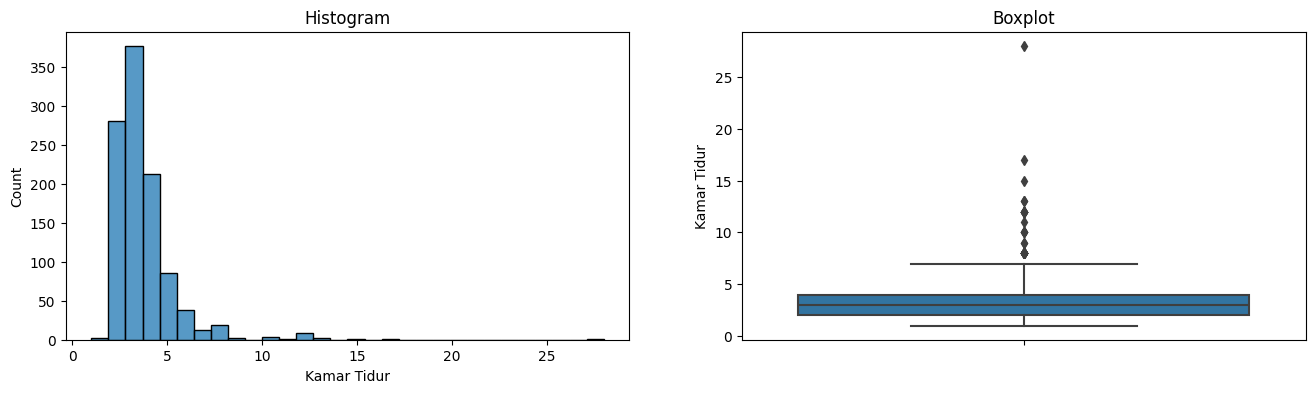


Kamar Tidur - After Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


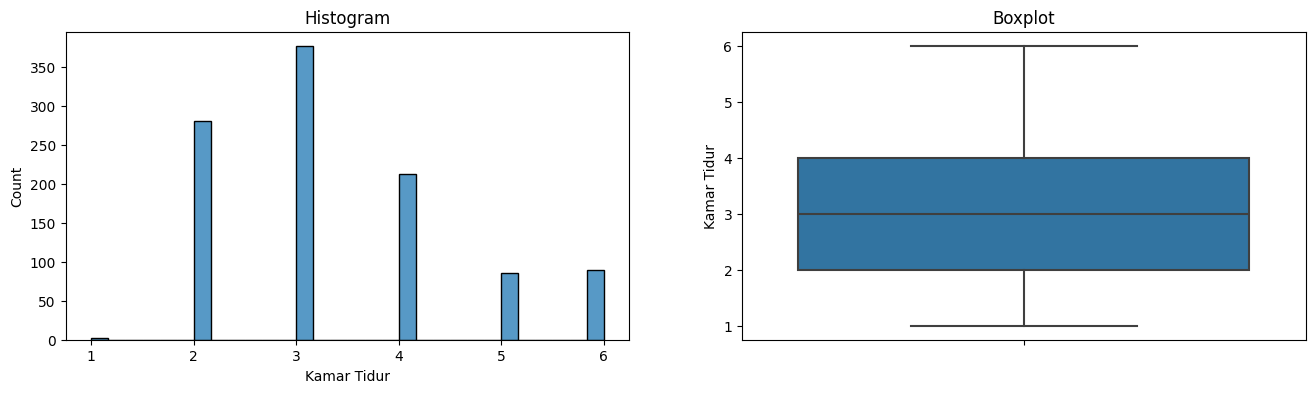

Kamar Mandi - Before Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


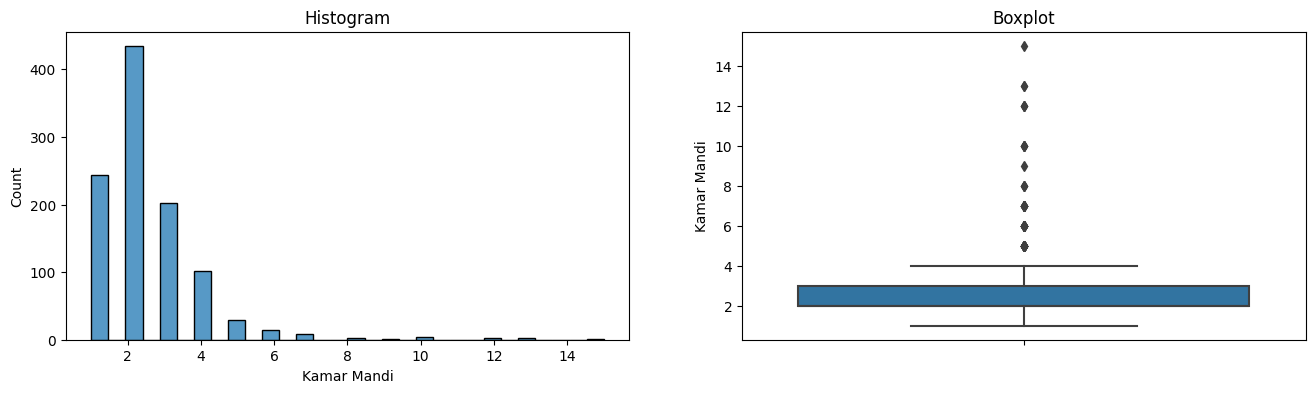


Kamar Mandi - After Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


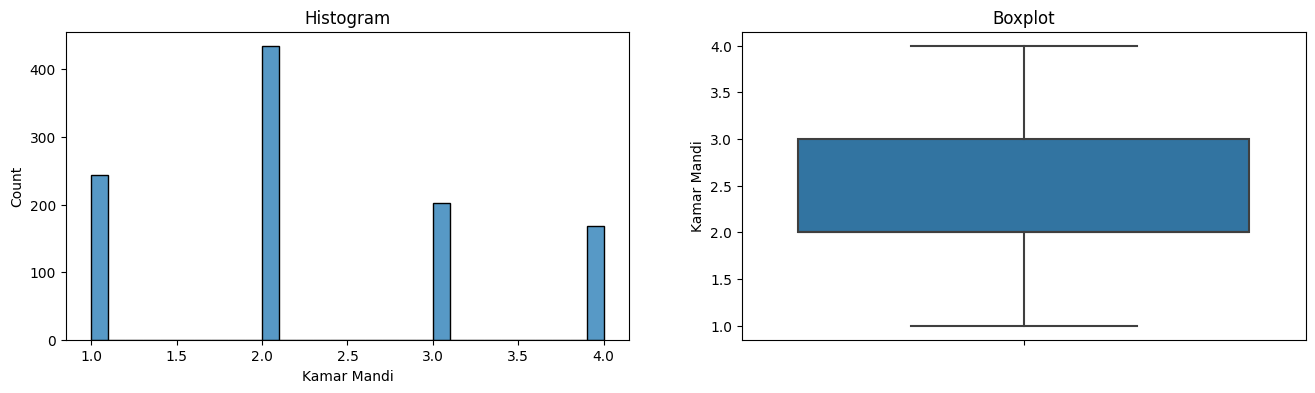

Luas Tanah - Before Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


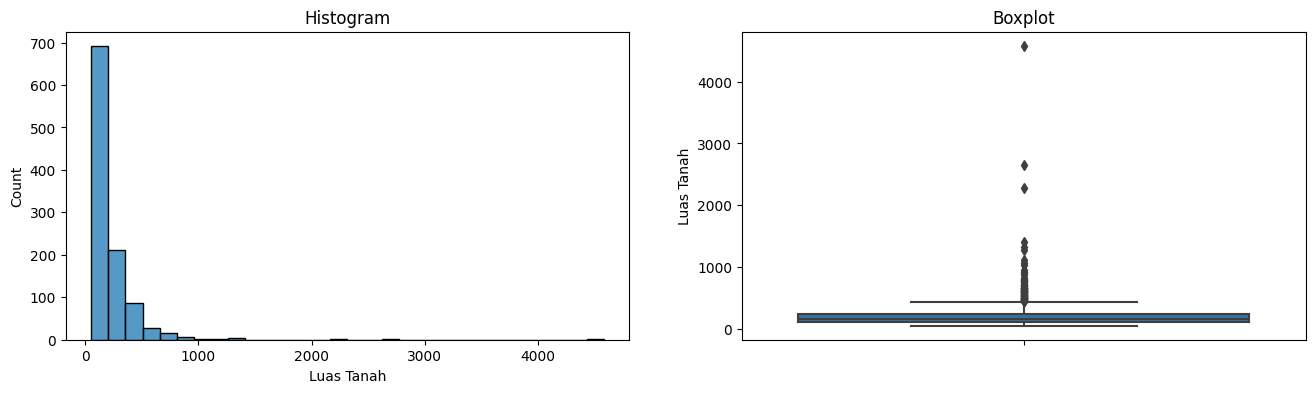


Luas Tanah - After Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


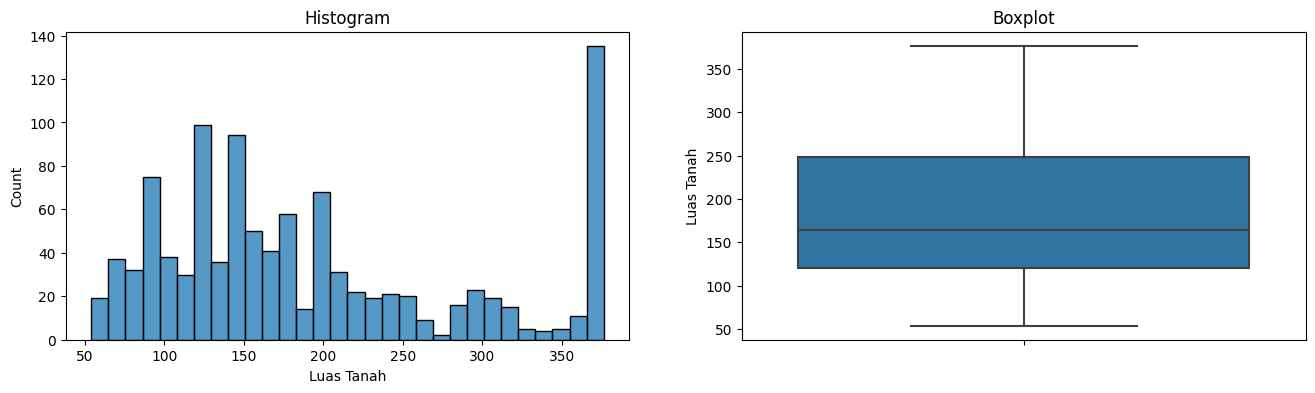

Luas Bangunan - Before Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


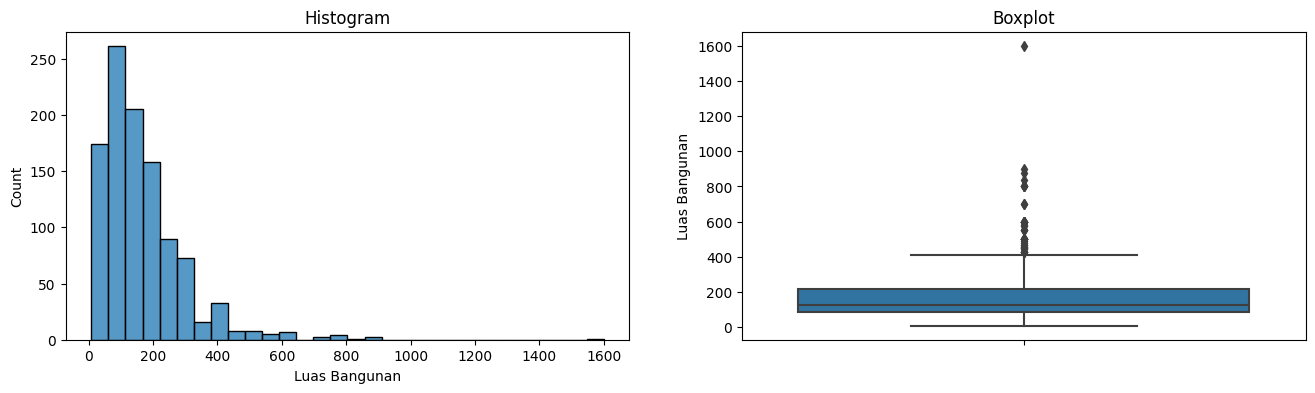


Luas Bangunan - After Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


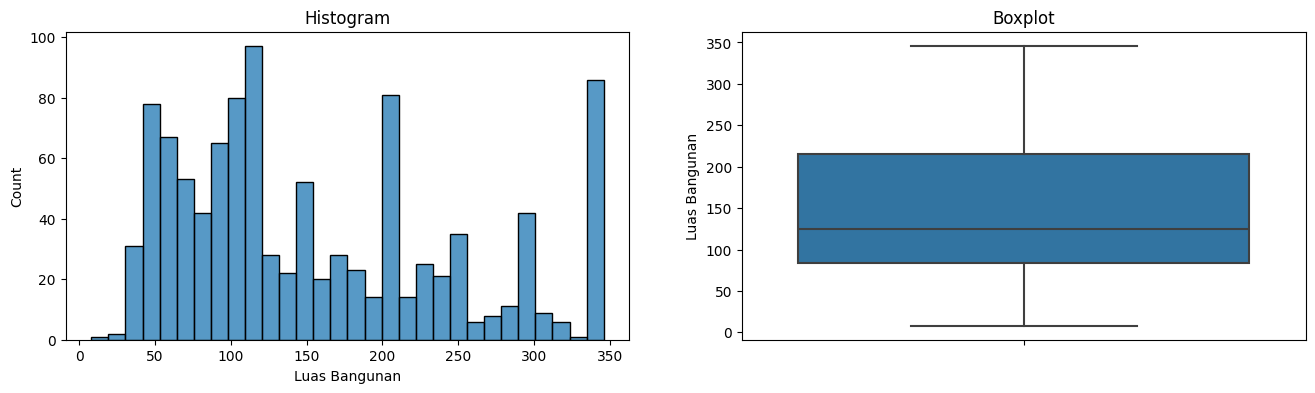

Daya Listrik - Before Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


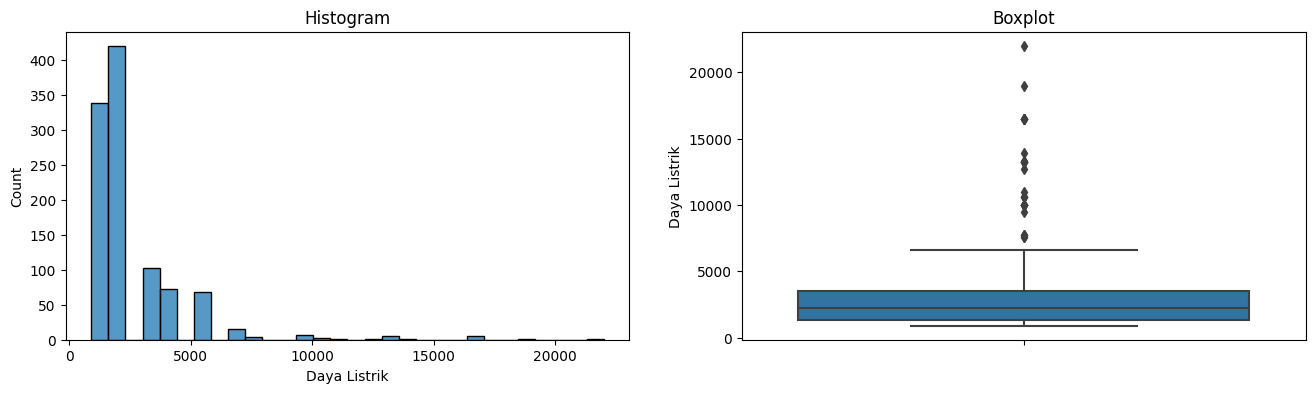


Daya Listrik - After Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


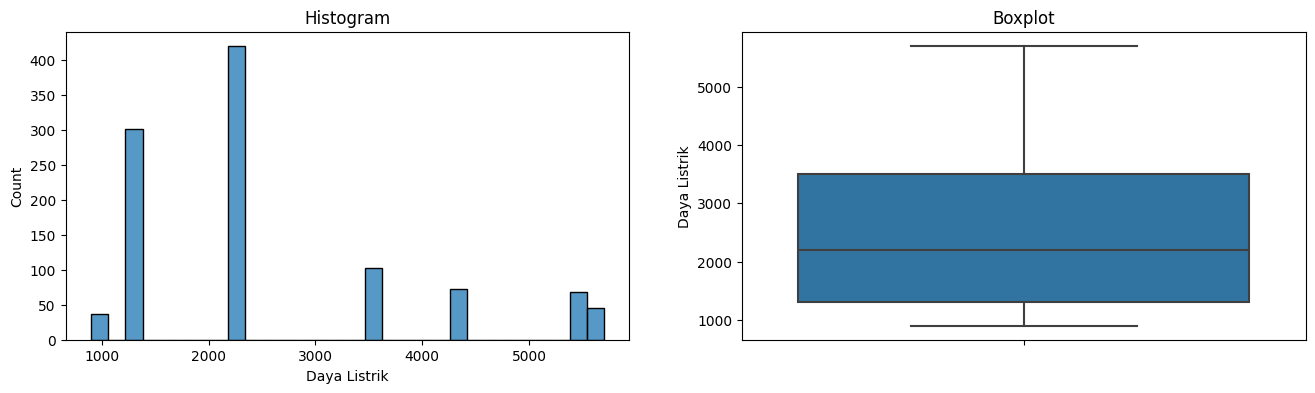

In [14]:
# Check the distribution before and after capping
for col in num_cols:
  print(f'{col} - Before Capping')
  diagnostic_plots(X_train, col)

  print(f'\n{col} - After Capping')
  diagnostic_plots(X_train_capped, col)

In [15]:
X_test.isnull().sum()

Lokasi           0
Kamar Tidur      0
Kamar Mandi      0
Luas Tanah       0
Luas Bangunan    0
Sertifikat       0
Daya Listrik     0
dtype: int64

In [16]:
y_train.isnull().sum()

0

In [17]:
X_train

,Lokasi,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik
449,"Balikpapan Selatan, Balikpapan",2.0,1.0,144,72,SHM - Sertifikat Hak Milik,1300
895,"Sumber Rejo, Balikpapan",3.0,1.0,78,42,SHM - Sertifikat Hak Milik,1300
411,"Balikpapan Baru, Balikpapan",3.0,1.0,120,93,SHM - Sertifikat Hak Milik,5500
995,"Balikpapan Kota, Balikpapan",6.0,4.0,150,174,SHM - Sertifikat Hak Milik,3500
1014,"Balikpapan Baru, Balikpapan",4.0,2.0,230,200,SHM - Sertifikat Hak Milik,2200
...,...,...,...,...,...,...,...
1292,"Damai, Balikpapan",5.0,5.0,280,226,SHM - Sertifikat Hak Milik,4400
1016,"Balikpapan Baru, Balikpapan",3.0,3.0,198,198,SHM - Sertifikat Hak Milik,3500
165,"Balikpapan Selatan, Balikpapan",3.0,2.0,165,250,SHM - Sertifikat Hak Milik,2200
7,"Balikpapan Utara, Balikpapan",6.0,4.0,396,400,SHM - Sertifikat Hak Milik,4400


### Split Between Num col and Cat col

In [18]:
#get numeric and categorical column

num_columns = X_train.select_dtypes(include = np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include = ['object']).columns.tolist()

print('Numeric Columns: ', num_columns)
print('Categorical Columns: ', cat_columns)

Numeric Columns:  ['Kamar Tidur', 'Kamar Mandi', 'Luas Tanah', 'Luas Bangunan', 'Daya Listrik']
Categorical Columns:  ['Lokasi', 'Sertifikat']


In [19]:
# Split numerical columns and categorical columns

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Daya Listrik
449,2.0,1.0,144,72,1300
895,3.0,1.0,78,42,1300
411,3.0,1.0,120,93,5500
995,6.0,4.0,150,174,3500
1014,4.0,2.0,230,200,2200
...,...,...,...,...,...
1292,5.0,5.0,280,226,4400
1016,3.0,3.0,198,198,3500
165,3.0,2.0,165,250,2200
7,6.0,4.0,396,400,4400


In [20]:
# Feature selection Numerical columns
p_values = []
interpretasi = []
cols = []

for col in X_train_num.columns:
  corr_coef, p_value = pearsonr(X_train_num[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})


,nama kolom,hasil
0,Kamar Tidur,ada korelasi
1,Kamar Mandi,ada korelasi
2,Luas Tanah,ada korelasi
3,Luas Bangunan,ada korelasi
4,Daya Listrik,ada korelasi


In [21]:
# Feature selection Kategorical columns
p_values = []
interpretasi = []
cols = []

for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})


,nama kolom,hasil
0,Lokasi,ada korelasi
1,Sertifikat,ada korelasi


## Model Definition

In [83]:
#Making column transformer for preprocessing
transformer = ColumnTransformer([
    ('scaler', StandardScaler(), selector(dtype_exclude='object')),
    ('encoding', OneHotEncoder(), selector(dtype_include='object'))
])

# #Making pipeline for catboost
# pipe_catboost = Pipeline([
# ('transformer', transformer),
# ('classifier', CatBoostClassifier())
# ])

# Making pipeline for LightGBM
pipe_lgbm = Pipeline([
    # ('transformer', transformer),
    ('classifier', LGBMRegressor(num_leaves=32))
])

# Making pipeline for XGBoost
pipe_xgb = Pipeline([
    # ('transformer', transformer),
    ('classifier', XGBRegressor(n_estimators=3000, max_depth=3))
])

# Making pipeline for Random Forest
pipe_rf = Pipeline([
    # ('transformer', transformer),
    ('classifier', RandomForestRegressor(
        n_estimators=100,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42
    ))
])

# Making pipeline for Linear Regression
pipe_log = Pipeline([
    # ('transformer', transformer),
    ('regressor', LogisticRegression(
        random_state=42
    ))
])

In [44]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

## Base Model Evaluation

### LGBMRegressor

In [47]:
model_lgbm = pipe_lgbm.fit(X_train_transformed, y_train)
print('Training Score: ',round(pipe_lgbm.score(X_train_transformed, y_train),4))
print('Testing Score: ', round(pipe_lgbm.score(X_test_transformed, y_test),4))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 309
[LightGBM] [Info] Number of data points in the train set: 1048, number of used features: 15
[LightGBM] [Info] Start training from score 1960.448473
Training Score:  0.8157
Testing Score:  0.6682


In [48]:
y_pred_lgbm_train = model_lgbm.predict(X_train_transformed)

y_pred_lgbm_test = model_lgbm.predict(X_test_transformed)

In [49]:
print('Results for Train Data:')
print(f'MAE Train : {mean_absolute_error(y_train,y_pred_lgbm_train)}')
print(f'MSE Train : {mean_squared_error(y_train,y_pred_lgbm_train)}')
print(f'RMSE Train : {np.sqrt(mean_squared_error(y_train,y_pred_lgbm_train))}')
print(f'MAPE Train : {mean_absolute_percentage_error(y_train,y_pred_lgbm_train)}')

Results for Train Data:
MAE Train : 364.3554807582371
MSE Train : 665087.521431113
RMSE Train : 815.528982581927
MAPE Train : 0.24021822781187271


In [50]:
print('Resutls for Test Data')
print(f'MAE Test : {mean_absolute_error(y_test,y_pred_lgbm_test)}')
print(f'MSE Test : {mean_squared_error(y_test,y_pred_lgbm_test)}')
print(f'RMSE Test : {np.sqrt(mean_squared_error(y_test,y_pred_lgbm_test))}')
print(f'MAPE Test : {mean_absolute_percentage_error(y_test,y_pred_lgbm_test)}')

Resutls for Test Data
MAE Test : 633.7253619193407
MSE Test : 2222246.674021681
RMSE Test : 1490.7201863601636
MAPE Test : 0.3004733455459559


### XGBRegressor

In [52]:
model = XGBRegressor()

# define model evaluation method
cv = StratifiedKFold(n_splits=10)
# evaluate model
scores = cross_val_score(model, X_train_transformed, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )
# print('Rmse:', round(mean_squared_log_error(y_pred, y_train) ** 0.5, 5))

model_xgb = pipe_xgb.fit(X_train_transformed, y_train)

print('Training Score: ', round(pipe_xgb.score(X_train_transformed, y_train), 4))
print('Testing Score: ', round(pipe_xgb.score(X_test_transformed, y_test), 4))

C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Mean MAE: 567.415 (98.810)
Training Score:  0.9983
Testing Score:  0.6699


In [53]:
y_pred_xgb_train = model_xgb.predict(X_train_transformed)

y_pred_xgb_test = model_xgb.predict(X_test_transformed)

In [54]:
print('Results for Train Data:')
print(f'MAE Train : {mean_absolute_error(y_train,y_pred_xgb_train)}')
print(f'MSE Train : {mean_squared_error(y_train,y_pred_xgb_train)}')
print(f'RMSE Train : {np.sqrt(mean_squared_error(y_train,y_pred_xgb_train))}')
print(f'MAPE Train : {mean_absolute_percentage_error(y_train,y_pred_xgb_train)}')

Results for Train Data:
MAE Train : 38.0257770378171
MSE Train : 6086.396194282478
RMSE Train : 78.01535870764472
MAPE Train : 0.049168185513496165


In [55]:
print('Resutls for Test Data')
print(f'MAE Test : {mean_absolute_error(y_test,y_pred_xgb_test)}')
print(f'MSE Test : {mean_squared_error(y_test,y_pred_xgb_test)}')
print(f'RMSE Test : {np.sqrt(mean_squared_error(y_test,y_pred_xgb_test))}')
print(f'MAPE Test : {mean_absolute_percentage_error(y_test,y_pred_xgb_test)}')

Resutls for Test Data
MAE Test : 747.2487533511096
MSE Test : 2210319.1817265395
RMSE Test : 1486.7142232878987
MAPE Test : 0.3556791684878885


### Random Forest

In [57]:
model_rf = pipe_rf.fit(X_train_transformed, y_train)
print('Training Score: ',round(pipe_rf.score(X_train_transformed, y_train),4))
print('Testing Score: ', round(pipe_rf.score(X_test_transformed, y_test),4))

Training Score:  0.9492
Testing Score:  0.7784


In [66]:
y_pred_rf_train = model_rf.predict(X_train_transformed)
y_pred_rf_test = model_rf.predict(X_test_transformed)

In [67]:
print('Results for Train Data:')
print(f'MAE Train : {mean_absolute_error(y_train,y_pred_rf_train)}')
print(f'MSE Train : {mean_squared_error(y_train,y_pred_rf_train)}')
print(f'RMSE Train : {np.sqrt(mean_squared_error(y_train,y_pred_rf_train))}')
print(f'MAPE Train : {mean_absolute_percentage_error(y_train,y_pred_rf_train)}')

Results for Train Data:
MAE Train : 208.86778218044677
MSE Train : 183356.3866671037
RMSE Train : 428.20133893660784
MAPE Train : 0.15090628005073375


In [68]:
print('Resutls for Test Data')
print(f'MAE Test : {mean_absolute_error(y_test,y_pred_rf_test)}')
print(f'MSE Test : {mean_squared_error(y_test,y_pred_rf_test)}')
print(f'RMSE Test : {np.sqrt(mean_squared_error(y_test,y_pred_rf_test))}')
print(f'MAPE Test : {mean_absolute_percentage_error(y_test,y_pred_rf_test)}')

Resutls for Test Data
MAE Test : 573.3914384163336
MSE Test : 1483823.6482437642
RMSE Test : 1218.1230020994449
MAPE Test : 0.28781722948058586


### Logistic Reggression

In [65]:
model_log = pipe_log.fit(X_train_transformed, y_train)
print('Training Score: ',round(model_log.score(X_train_transformed, y_train),4))
print('Testing Score: ', round(model_log.score(X_test_transformed, y_test),4))

Training Score:  0.1842
Testing Score:  0.0611


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Compare Models

In [78]:
# compile all result in a dataframe

results = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost', 'Random Forest', 'Logistic Regression'],
    'Training Score': [model_lgbm.score(X_train_transformed, y_train), model_xgb.score(X_train_transformed, y_train), model_rf.score(X_train_transformed, y_train), model_log.score(X_train_transformed, y_train)],
    'Testing Score': [model_lgbm.score(X_test_transformed, y_test), model_xgb.score(X_test_transformed, y_test), model_rf.score(X_test_transformed, y_test), model_log.score(X_test_transformed, y_test)],
   })

result_train = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost', 'Random Forest', 'Logistic Regression'],
    'MAE Train': [mean_absolute_error(y_train,y_pred_lgbm_train), mean_absolute_error(y_train,y_pred_xgb_train), mean_absolute_error(y_train,y_pred_rf_train), mean_absolute_error(y_train,model_log.predict(X_train_transformed))],
    'MSE Train': [mean_squared_error(y_train,y_pred_lgbm_train), mean_squared_error(y_train,y_pred_xgb_train), mean_squared_error(y_train,y_pred_rf_train), mean_squared_error(y_train,model_log.predict(X_train_transformed))],
    'RMSE Train': [np.sqrt(mean_squared_error(y_train,y_pred_lgbm_train)), np.sqrt(mean_squared_error(y_train,y_pred_xgb_train)), np.sqrt(mean_squared_error(y_train,y_pred_rf_train)), np.sqrt(mean_squared_error(y_train,model_log.predict(X_train_transformed)))],
    'MAPE Train': [mean_absolute_percentage_error(y_train,y_pred_lgbm_train), mean_absolute_percentage_error(y_train,y_pred_xgb_train), mean_absolute_percentage_error(y_train,y_pred_rf_train), mean_absolute_percentage_error(y_train,model_log.predict(X_train_transformed))]
   })

result_test = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost', 'Random Forest', 'Logistic Regression'],
    'MAE Test': [mean_absolute_error(y_test,y_pred_lgbm_test), mean_absolute_error(y_test,y_pred_xgb_test), mean_absolute_error(y_test,y_pred_rf_test), mean_absolute_error(y_test,model_log.predict(X_test_transformed))],
    'MSE Test': [mean_squared_error(y_test,y_pred_lgbm_test), mean_squared_error(y_test,y_pred_xgb_test), mean_squared_error(y_test,y_pred_rf_test), mean_squared_error(y_test,model_log.predict(X_test_transformed))],
    'RMSE Test': [np.sqrt(mean_squared_error(y_test,y_pred_lgbm_test)), np.sqrt(mean_squared_error(y_test,y_pred_xgb_test)), np.sqrt(mean_squared_error(y_test,y_pred_rf_test)), np.sqrt(mean_squared_error(y_test,model_log.predict(X_test_transformed)))],
    'MAPE Test': [mean_absolute_percentage_error(y_test,y_pred_lgbm_test), mean_absolute_percentage_error(y_test,y_pred_xgb_test), mean_absolute_percentage_error(y_test,y_pred_rf_test), mean_absolute_percentage_error(y_test,model_log.predict(X_test_transformed))]
   })

In [76]:
results

,Model,Training Score,Testing Score
0,LightGBM,0.815730,0.668158
1,XGBoost,0.998314,0.669939
2,Random Forest,0.949199,0.778425
3,Logistic Regression,0.184160,0.061069


In [79]:
result_train

,Model,MAE Train,MSE Train,RMSE Train,MAPE Train
0,LightGBM,364.355481,6.650875e+05,815.528983,0.240218
1,XGBoost,38.025777,6.086396e+03,78.015359,0.049168
2,Random Forest,208.867782,1.833564e+05,428.201339,0.150906
3,Logistic Regression,586.308206,1.115481e+06,1056.163535,0.377906


In [80]:
result_test

,Model,MAE Test,MSE Test,RMSE Test,MAPE Test
0,LightGBM,633.725362,2.222247e+06,1490.720186,0.300473
1,XGBoost,747.248753,2.210319e+06,1486.714223,0.355679
2,Random Forest,573.391438,1.483824e+06,1218.123002,0.287817
3,Logistic Regression,841.209924,1.973883e+06,1404.949404,0.408507


## Param Tuning

### Random Forest Hyperparameter Tuning

In [88]:
##Parameter Tuning

param_rf = {
    'n_estimators': [10, 25, 50, 75, 100],  
    'max_depth': [5, 7, 10, 15],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10]
}

In [91]:
# grid_rf = GridSearchCV(RandomForestRegressor(), param_rf, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_absolute_error')

# # Fit the GridSearchCV object with data
# grid_rf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 10, 15],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [10, 25, 50, 75, 100]},
             scoring='neg_mean_absolute_error', verbose=1)

In [92]:
# grid_rf.best_params_

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [95]:
# use best parameters
model_rf_tuned = RandomForestRegressor(
    n_estimators=50,
    max_depth=15,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# fit the model
model_rf_tuned.fit(X_train_transformed, y_train)

# predict the target
y_pred_rf_tuned_train = model_rf_tuned.predict(X_train_transformed)
y_pred_rf_tuned_test = model_rf_tuned.predict(X_test_transformed)

# compile all result in a dataframe

results_rf_tuned = pd.DataFrame({
    'Model': ['Random Forest', 'Random Forest Tuned'],
    'Training Score': [model_rf.score(X_train_transformed, y_train), model_rf_tuned.score(X_train_transformed, y_train)],
    'Testing Score': [model_rf.score(X_test_transformed, y_test), model_rf_tuned.score(X_test_transformed, y_test)],
   })

results_rf_tuned

# print('Results for Train Data:')
# print(f'MAE Train : {mean_absolute_error(y_train,y_pred_rf_tuned_train)}')
# print(f'MSE Train : {mean_squared_error(y_train,y_pred_rf_tuned_train)}')
# print(f'RMSE Train : {np.sqrt(mean_squared_error(y_train,y_pred_rf_tuned_train))}')
# print(f'MAPE Train : {mean_absolute_percentage_error(y_train,y_pred_rf_tuned_train)}')

# print('Resutls for Test Data')
# print(f'MAE Test : {mean_absolute_error(y_test,y_pred_rf_tuned_test)}')
# print(f'MSE Test : {mean_squared_error(y_test,y_pred_rf_tuned_test)}')
# print(f'RMSE Test : {np.sqrt(mean_squared_error(y_test,y_pred_rf_tuned_test))}')
# print(f'MAPE Test : {mean_absolute_percentage_error(y_test,y_pred_rf_tuned_test)}')

,Model,Training Score,Testing Score
0,Random Forest,0.949199,0.778425
1,Random Forest Tuned,0.947624,0.774137


### LightGBM Hyperparameter Tuning

In [96]:
param_lgbm = {
    'num_leaves': [20, 30, 40, 50],  
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [5, 7, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

In [97]:
# grid_lgbm = GridSearchCV(LGBMRegressor(), param_lgbm, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_absolute_error')

# # Fit the GridSearchCV object with data
# grid_lgbm.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 309
[LightGBM] [Info] Number of data points in the train set: 1048, number of used features: 15
[LightGBM] [Info] Start training from score 1960.448473
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [5, 7, 10, 15],
                         'n_estimators': [100, 200, 300, 400],
                         'num_leaves': [20, 30, 40, 50]},
             scoring='neg_mean_absolute_error', verbose=1)

In [99]:
# grid_lgbm.best_params_

{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 300, 'num_leaves': 30}

In [100]:
# use best parameters
model_lgbm_tuned = LGBMRegressor(
    num_leaves=30,
    n_estimators=300,
    max_depth=15,
    learning_rate=0.1
)

# fit the model
model_lgbm_tuned.fit(X_train_transformed, y_train)

# predict the target
y_pred_lgbm_tuned_train = model_lgbm_tuned.predict(X_train_transformed)
y_pred_lgbm_tuned_test = model_lgbm_tuned.predict(X_test_transformed)

# compile all result in a dataframe
results_lgbm_tuned = pd.DataFrame({
    'Model': ['LightGBM', 'LightGBM Tuned'],
    'Training Score': [model_lgbm.score(X_train_transformed, y_train), model_lgbm_tuned.score(X_train_transformed, y_train)],
    'Testing Score': [model_lgbm.score(X_test_transformed, y_test), model_lgbm_tuned.score(X_test_transformed, y_test)],
   })

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 309
[LightGBM] [Info] Number of data points in the train set: 1048, number of used features: 15
[LightGBM] [Info] Start training from score 1960.448473
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [101]:
results_lgbm_tuned

,Model,Training Score,Testing Score
0,LightGBM,0.81573,0.668158
1,LightGBM Tuned,0.89339,0.668931


### XGBoost Hyperparameter Tuning

In [103]:
param_xgb = {
    'n_estimators': [100, 200, 300, 400],  
    'max_depth': [5, 7, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

In [104]:
# grid_xgb = GridSearchCV(XGBRegressor(), param_xgb, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_absolute_error')

# # Fit the GridSearchCV object with data
# grid_xgb.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [5, 7, 10, 15],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='neg_mean_absolute_error', verbose=1)

In [105]:
# grid_xgb.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 400}

In [106]:
# use best parameters
model_xgb_tuned = XGBRegressor(
    n_estimators=400,
    max_depth=10,
    learning_rate=0.1
)

# fit the model
model_xgb_tuned.fit(X_train_transformed, y_train)

# predict the target
y_pred_xgb_tuned_train = model_xgb_tuned.predict(X_train_transformed)
y_pred_xgb_tuned_test = model_xgb_tuned.predict(X_test_transformed)

# compile all result in a dataframe
results_xgb_tuned = pd.DataFrame({
    'Model': ['XGBoost', 'XGBoost Tuned'],
    'Training Score': [model_xgb.score(X_train_transformed, y_train), model_xgb_tuned.score(X_train_transformed, y_train)],
    'Testing Score': [model_xgb.score(X_test_transformed, y_test), model_xgb_tuned.score(X_test_transformed, y_test)],
   })

In [107]:
results_xgb_tuned

,Model,Training Score,Testing Score
0,XGBoost,0.998314,0.669939
1,XGBoost Tuned,0.998963,0.728817
